In [4]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform, LinearFilterBank, DyadicFilterBank
import matplotlib.pyplot as plt
from invertiblewavelets import Cauchy
import time

"This notebook requires MAGPRIME for data loading. Uncomment to install."
# !pip install git+https://github.com/aphoffmann/MAGPRIME.git
from magprime import utility

#### Load Example Data from Swarm A Spacecraft Magnetometer

In [5]:
data = utility.load_swarm_data(160000,165000)[2] # Units in nanoTesla
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array

c:\Users\aphoffm2\AppData\Local\anaconda3\envs\mag\Lib\site-packages\magprime\utility\data_loader.py:28: DtypeWarning: Columns (2,5,6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path, sep=',',header=None)


#### Dyadic Scale Set

In [8]:
# -------------------------------------------------------------------
# filter-length ➜ RMSE
# -------------------------------------------------------------------
def rmse_for_Lh(Lh, sample_rate, data):
    fb = DyadicFilterBank(
        wavelet=Cauchy(1000),
        fs=sample_rate,
        N=Lh,
        real=True,
        dj=1/8,
        s_max=2,
        compensation=True
    )
    tr    = Transform.from_filterbank(fb)
    recon = tr.inverse(tr.forward(data, mode='full'), mode='full', Lx=5000)

    margin = 1000
    err    = recon[margin:-margin] - data[margin:-margin]
    return np.sqrt(np.mean(err**2))


# -------------------------------------------------------------------
# main: parallel sweep with a *responsive* bar
# -------------------------------------------------------------------
# --- analysis target ---------------------------------------------
low, high = 4000, 10000          # inclusive start, exclusive stop
rng       = np.random.default_rng(42)   # seed for reproducibility

# keep stepping by 1‒10 until we’d exceed `high`
steps = rng.integers(50, 100, size=high-low)     # overshoot then trim
Lhs   = np.cumsum(np.insert(steps, 0, low))    # start at 1000
Lhs   = Lhs[Lhs < high]
rmses  = []


# --- sweep (single process, live plot) ---------------------------
for Lh in Lhs:
    rmse = rmse_for_Lh(Lh, sample_rate=sample_rate, data=data)
    rmses.append(rmse)
    print(f"RMSE for Lh={Lh}: {rmse:.2f}")


RMSE for Lh=4000: 0.35
RMSE for Lh=4054: 0.46
RMSE for Lh=4142: 0.00
RMSE for Lh=4224: 0.00
RMSE for Lh=4295: 0.00
RMSE for Lh=4366: 0.00
RMSE for Lh=4458: 0.00
RMSE for Lh=4512: 0.00
RMSE for Lh=4596: 0.00
RMSE for Lh=4656: 0.00
RMSE for Lh=4710: 0.00
RMSE for Lh=4786: 0.00
RMSE for Lh=4884: 0.00
RMSE for Lh=4970: 0.00
RMSE for Lh=5058: 0.00
RMSE for Lh=5143: 0.00
RMSE for Lh=5232: 0.00
RMSE for Lh=5307: 0.00
RMSE for Lh=5363: 0.00
RMSE for Lh=5454: 0.00
RMSE for Lh=5526: 0.00
RMSE for Lh=5601: 0.00
RMSE for Lh=5669: 0.00
RMSE for Lh=5728: 0.00
RMSE for Lh=5824: 0.00
RMSE for Lh=5913: 0.00
RMSE for Lh=5995: 0.00
RMSE for Lh=6065: 0.00
RMSE for Lh=6156: 0.00
RMSE for Lh=6233: 0.00
RMSE for Lh=6305: 0.00
RMSE for Lh=6377: 0.00
RMSE for Lh=6438: 0.00
RMSE for Lh=6492: 0.00
RMSE for Lh=6569: 0.00
RMSE for Lh=6663: 0.00
RMSE for Lh=6716: 0.00
RMSE for Lh=6808: 0.00
RMSE for Lh=6899: 0.00
RMSE for Lh=6962: 0.00
RMSE for Lh=7043: 0.00
RMSE for Lh=7101: 0.00
RMSE for Lh=7188: 0.00
RMSE for Lh

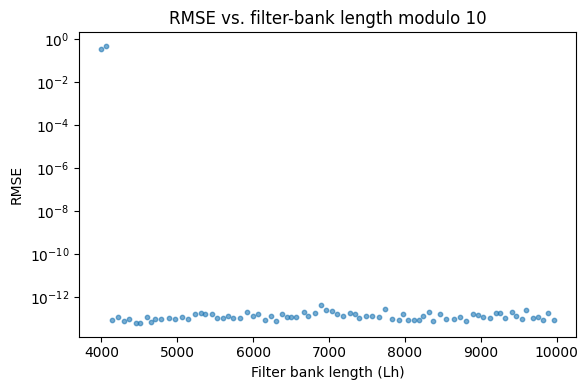

In [9]:
# ── 1) strip-plot (all points with a tiny horizontal jitter) ──────────
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    Lhs,
    rmses,
    s     = 10,
    alpha = 0.6,
)

ax.set_xlabel("Filter bank length (Lh)")
ax.set_ylabel("RMSE")
ax.set_yscale("log")
ax.set_title("RMSE vs. filter-bank length modulo 10")
plt.tight_layout()
plt.show()